In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt


import sys
sys.path.append('/Users/amuratov/gits/EncodeNMF')


import OONMF
import OONMFhelpers as OH
import OONMFmetadata as OMD

In [18]:
projectedNMF = OONMF.NMFobject(16)

In [19]:
projectedNMF.matrix_input_name('2019-05-08MotifClusterPA_X_ComponentsNC16NNDSVD.npy')


In [20]:
projectedNMF.read_matrix_input()


In [21]:
projectedNMF.normalize_matrices()

In [22]:
projectedNMF.Basis.shape

(283, 16)

In [23]:
projectedNMF.NormedBasis.shape

(283, 16)

In [24]:
np.sum(projectedNMF.NormedBasis[0])

0.9999999999999999

In [25]:
np.sum(projectedNMF.NormedBasis, axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan, nan,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [30]:
projectedNMF.NormedBasis = np.nan_to_num(projectedNMF.NormedBasis)

In [31]:
np.sum(projectedNMF.NormedBasis, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.

In [34]:
projectedNMF.NormedBasis.shape

(283, 16)

In [39]:
motifnames = pd.read_csv('colanes_byline.txt', header=None).values.flatten()

In [42]:

barsortorder = OH.get_barsortorder_OfficialOrder(projectedNMF.NormedBasis)


## Visualize motifs clusters

<Figure size 432x288 with 0 Axes>

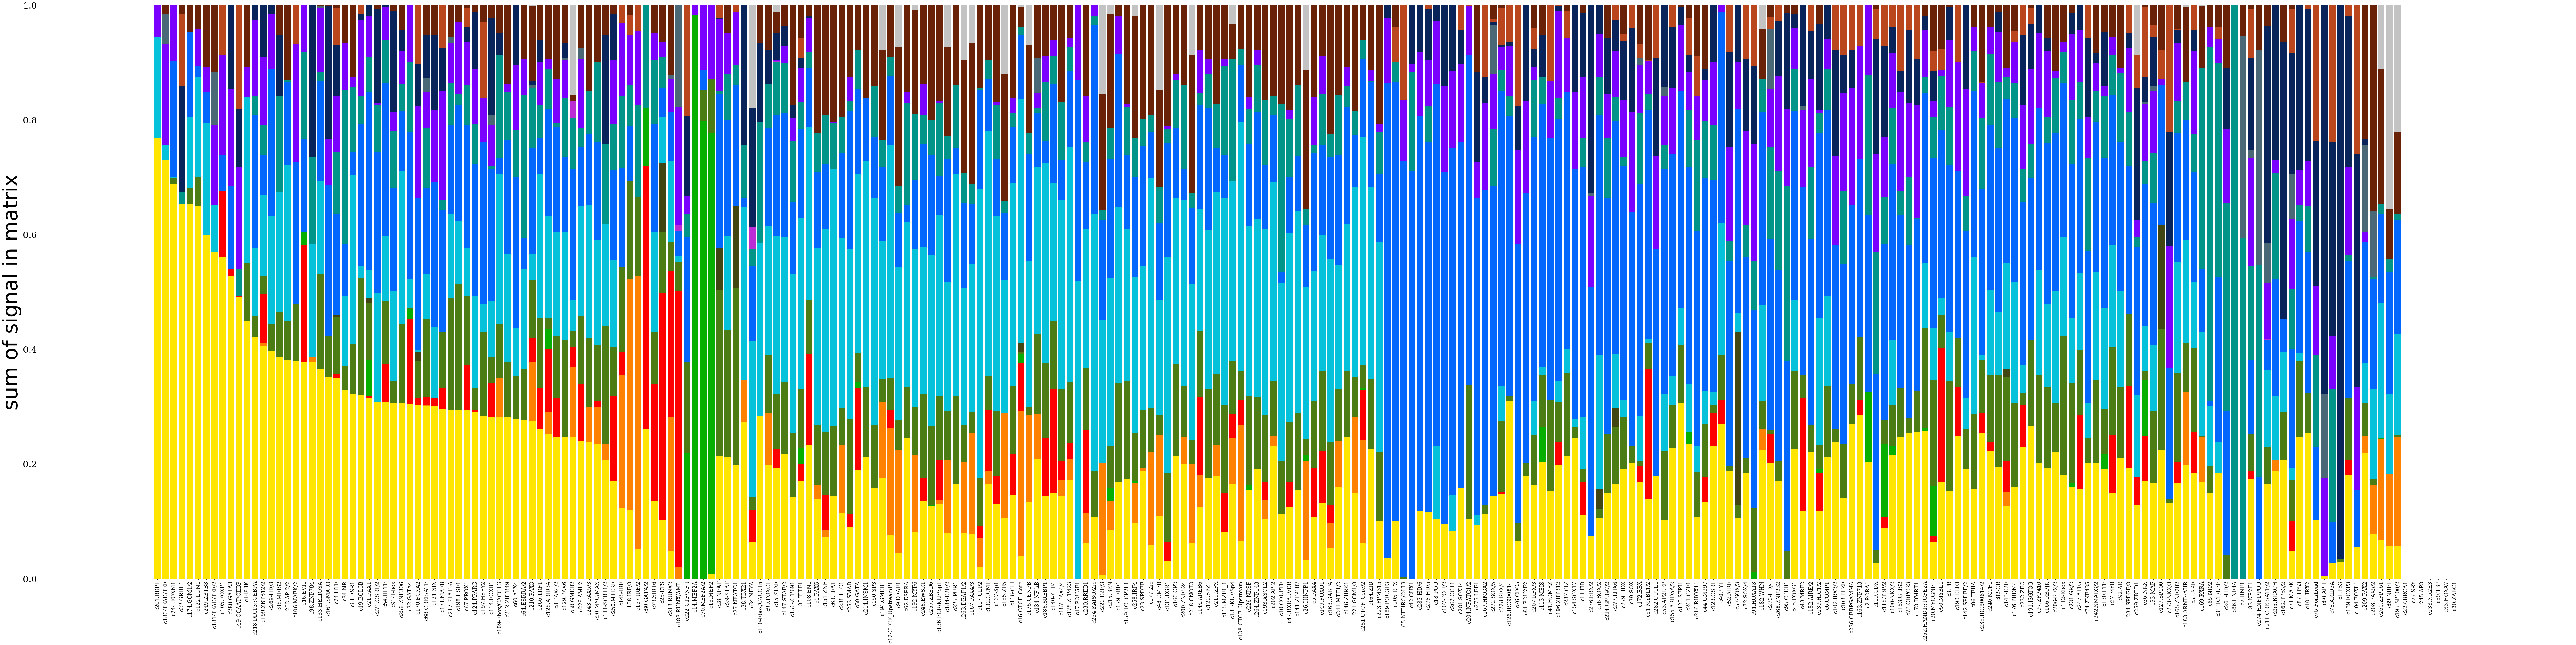

In [55]:
projectedNMF.make_stacked_bar_plot(projectedNMF.NormedBasis.shape[0], projectedNMF.NormedBasis.T, 'OONMF_motif_projection.pdf', names=motifnames, barsortorder=barsortorder, official_order = True)


In [49]:
motif_PRAUC_DF = pd.read_csv('52019_motifAUPRC.csv', sep='\t', index_col=0)

In [50]:
motif_PRAUC_DF.head()

,Motif,AUPRC
0,c278-HD/5,0.136285
1,c25-ETS,0.257626
2,c75-Forkhead,0.118321
3,c265-HD/2,0.037593
4,c90-MYC/MAX,0.126926


In [51]:
AUPRCstrs = []
for i in range(motif_PRAUC_DF.shape[0]):
    AUPRCstrs.append('{:3.4f}'.format(motif_PRAUC_DF.AUPRC.values[i]))

In [52]:
name_AUPRCstrs = []
for i in range(motif_PRAUC_DF.shape[0]):
    name_AUPRCstrs.append( motif_PRAUC_DF.Motif.values[i]+'_AUPRC_'+'{:3.4f}'.format(motif_PRAUC_DF.AUPRC.values[i]))

In [53]:
len(name_AUPRCstrs)

283

<Figure size 432x288 with 0 Axes>

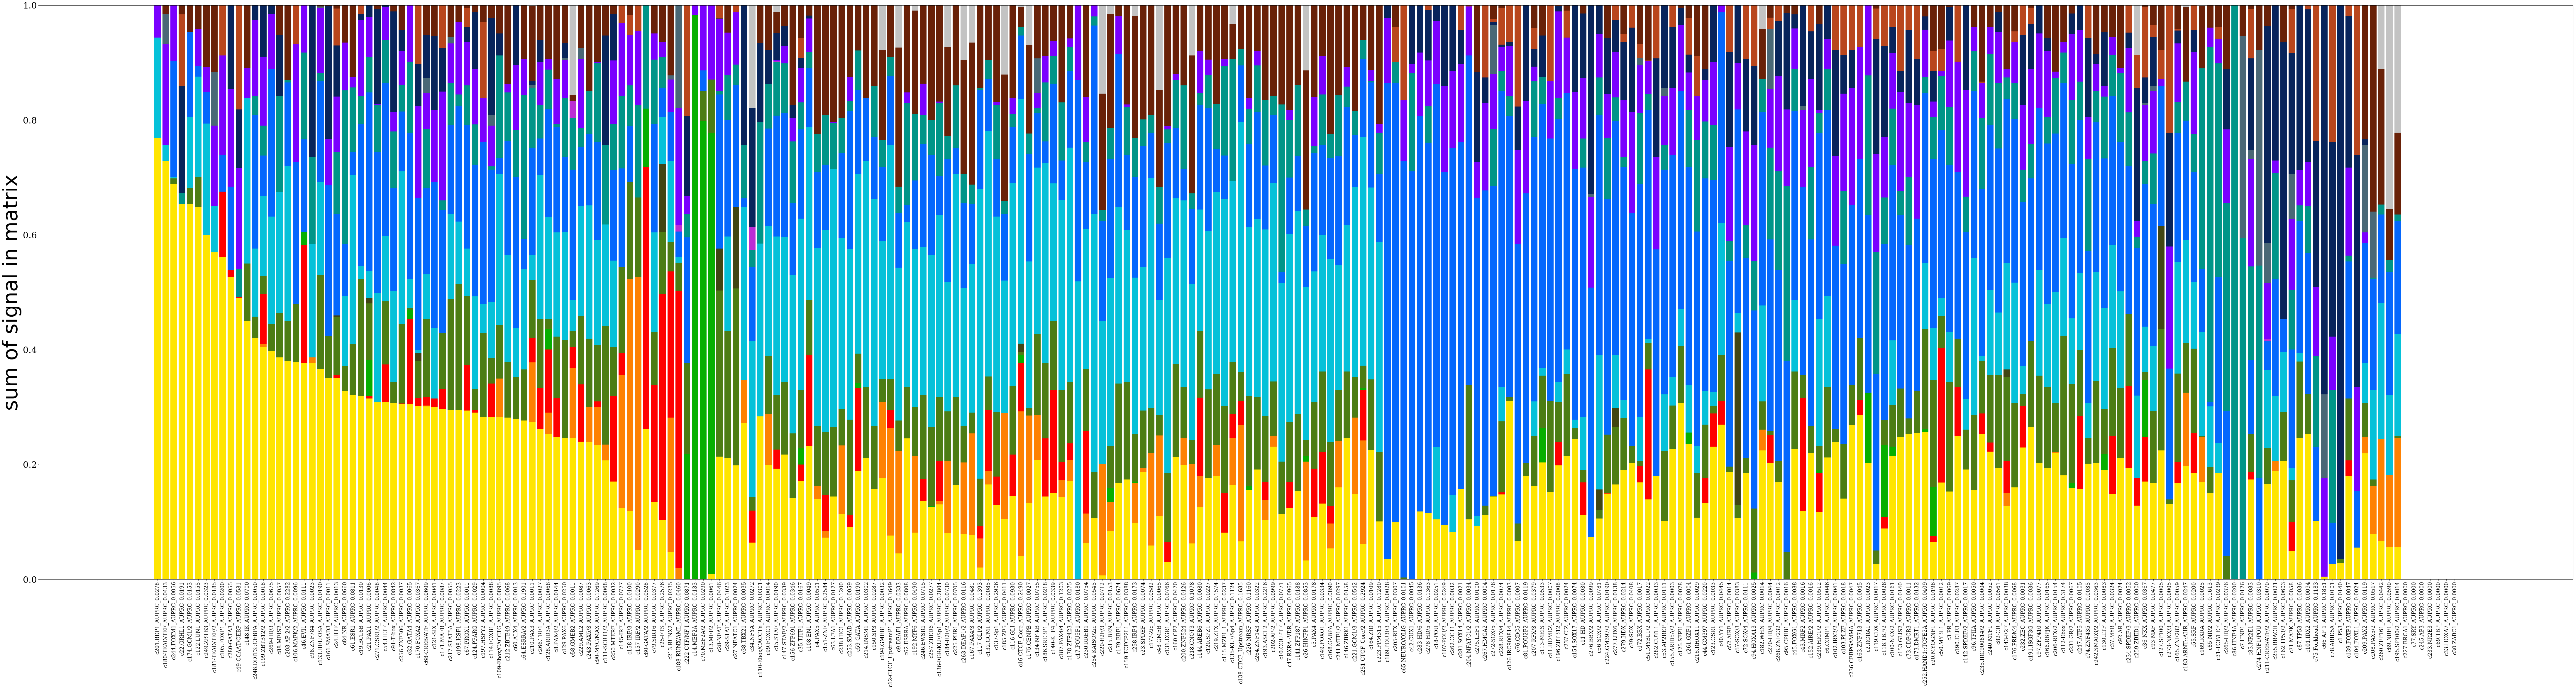

In [56]:
projectedNMF.make_stacked_bar_plot(projectedNMF.NormedBasis.shape[0], projectedNMF.NormedBasis.T, 'OONMF_motif_projection_withAUPRC.pdf', names=np.array(name_AUPRCstrs), barsortorder=barsortorder, official_order = True)

## Compare our projection to direct decomposition on motif x DHS matrix 

In [58]:
direct_AUPRC = pd.read_csv('51519_motif_direct_AUPRC.csv', sep='\t')

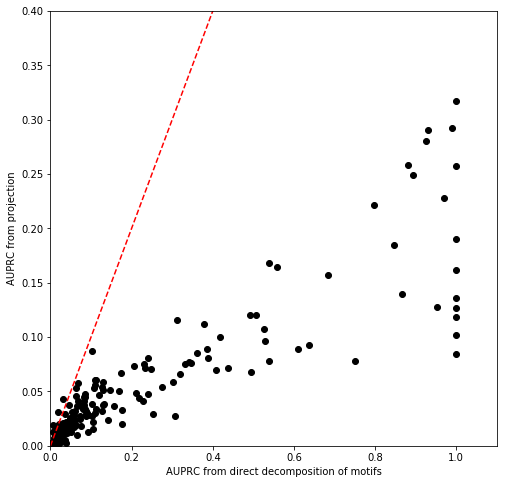

In [60]:
plt.figure(figsize=(8,8))
plt.plot(direct_AUPRC.AUPRC, motif_PRAUC_DF.AUPRC, 'ok')
plt.plot([0,1], [0,1], '--r')
plt.xlim([0,1.1])
plt.ylim([0, 0.4])
plt.xlabel('AUPRC from direct decomposition of motifs')
plt.ylabel('AUPRC from projection')
plt.show()

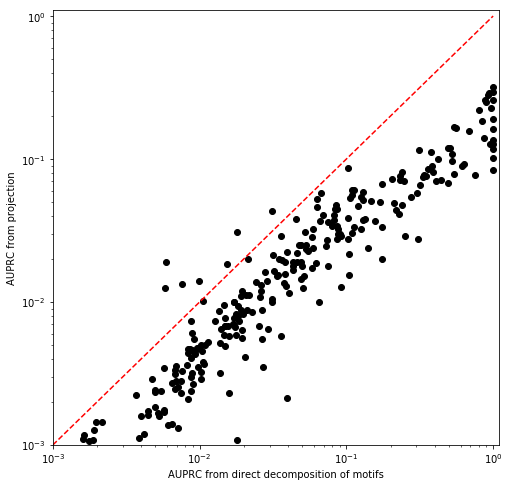

In [62]:
plt.figure(figsize=(8,8))
plt.plot(direct_AUPRC.AUPRC, motif_PRAUC_DF.AUPRC, 'ok')
plt.plot([1e-3,1], [1e-3,1], '--r')
plt.xlim([1e-3,1.1])
plt.ylim([1e-3,1.1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('AUPRC from direct decomposition of motifs')
plt.ylabel('AUPRC from projection')
plt.show()

## compare total projected loadings for each cluster to AUPRC

In [63]:
total_projected_motif_loading = np.sum(projectedNMF.Basis, axis=1)

In [64]:
len(total_projected_motif_loading)

283

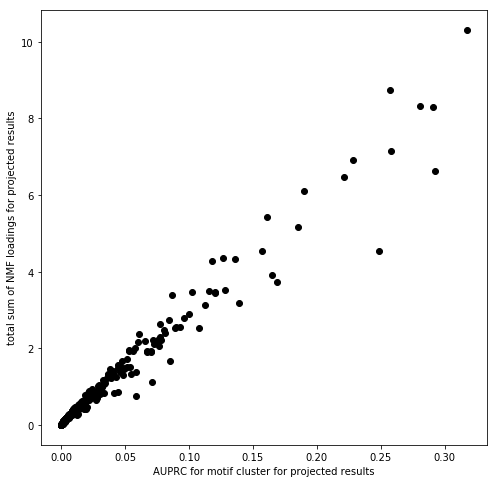

In [68]:
plt.figure(figsize=(8,8))
plt.plot(motif_PRAUC_DF.AUPRC,total_projected_motif_loading, 'ok')
plt.xlabel('AUPRC for motif cluster for projected results')
plt.ylabel('total sum of NMF loadings for projected results')
plt.show()

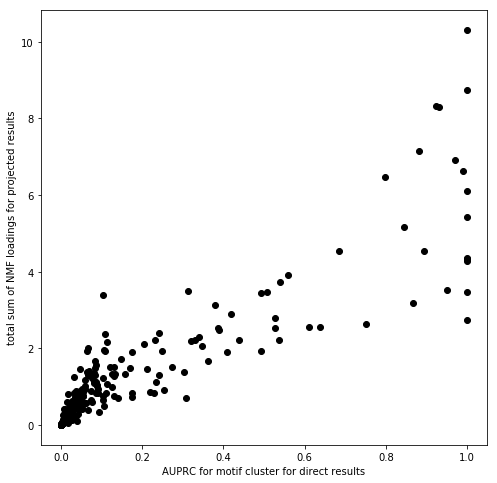

In [69]:
plt.figure(figsize=(8,8))
plt.plot(direct_AUPRC.AUPRC,total_projected_motif_loading, 'ok')
plt.xlabel('AUPRC for motif cluster for direct results')
plt.ylabel('total sum of NMF loadings for projected results')
plt.show()

# Does the dominant component in the motif projection match those from wouter's own motif enrichment analysis?

In [70]:
wouterDF = pd.read_csv('motif_clust_hits_WM20181206.txt', sep='\t')

In [71]:
motif_PRAUC_DF['sasha_maj_comp'] = np.argmax(projectedNMF.Basis,axis=1)+1

In [72]:
motif_PRAUC_DF.head()

,Motif,AUPRC,sasha_maj_comp
0,c278-HD/5,0.136285,8
1,c25-ETS,0.257626,15
2,c75-Forkhead,0.118321,16
3,c265-HD/2,0.037593,13
4,c90-MYC/MAX,0.126926,7


In [73]:
wouterDF.head()

,Gene_Name,PWM_Name,Cluster,maj_comp,max_comp,Genes_cluster,numGenes_cluster,num
0,CEBPA,MA0102.1-Cebpa,c49-CCAAT/CEBP,7,1.945672,"CEBPA,CEBPB,CEBPD",3,1
1,GRHL1,GRHL1_CP2_1,c22.GRHL1,7,1.926913,"GRHL1,TFCP2",2,2
2,GCM1,GCM1_GCM_1,c174.GCM1/2,7,1.717600,"GCM1,GCM2",2,3
3,TEAD3,TEAD3_TEA_1,c180-TEAD/TEF,7,1.421880,"TEAD1,TEAD3",2,4
4,TFAP2E,Tcfap2e_primary,c203-AP-2/2,7,1.115567,"TCFAP2A,TFAP2A,TFAP2B,TFAP2C,TFAP2E",5,5


In [75]:
num_match = 0 
num_non_match = 0
num_not_found = 0 


for i, clustname in enumerate(motif_PRAUC_DF.Motif.values):
    cluster_to_lookat = motif_PRAUC_DF.loc[i].Motif
    wouter_motif_cut = wouterDF.Cluster.values == cluster_to_lookat
    if len(wouter_motif_cut[wouter_motif_cut]) < 1:
        num_not_found+=1
        continue
    
    wouter_majcomps = wouterDF[wouter_motif_cut].maj_comp.values
    the_sasha_maj_comp = motif_PRAUC_DF.loc[i].sasha_maj_comp
    
    if the_sasha_maj_comp in wouter_majcomps:
        num_match+=1
    else:
        num_non_match+=1
    

In [77]:
print('number of motifs that matched between sasha and wouter:', num_match)
print('number of motifs that did not match between sasha and wouter:', num_non_match)
print('number of motifs not analyzed by wouter:', num_not_found)

number of motifs that matched between sasha and wouter: 39
number of motifs that did not match between sasha and wouter: 53
number of motifs not analyzed by wouter: 191


#### note, the normalized version fares much better http://localhost:8888/notebooks/June2019/60519/6-05-19%20compare%20my%2025D%20NMF%20to%20wouter%20NormedMix.ipynb